In [1]:
import pandas as pd
import matplotlib
import matplotlib.backends.backend_pdf as pdf
import matplotlib.pyplot as plt
import matplotlib.patches as pch

In [2]:
# Watermark is not required for this code, but is included for information. 
import watermark
%load_ext watermark
%watermark -a "ELEANOR LUTZ" -d -v -iv -m

pandas                          0.23.4
matplotlib.backends.backend_pdf 3.0.3
matplotlib                      3.0.3
watermark                       1.8.1
ELEANOR LUTZ 2019-07-14 

CPython 3.7.1
IPython 7.2.0

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 63 Stepping 2, GenuineIntel
CPU cores  : 12
interpreter: 64bit


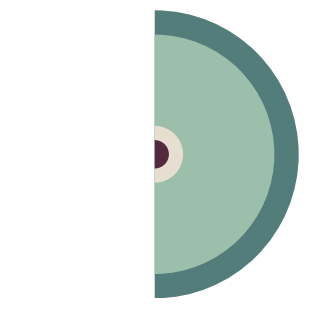

In [3]:
df = pd.read_csv('./data/core_sources.csv')
df.sort_values(by='depth_order', inplace=True)

savename = './figures/jupiter_core.pdf'
total_radius = df['km_from_previous'].astype(float).sum()

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, aspect='equal')
width = 0
for index, row in df.iterrows():
    curr_width = float(row['km_from_previous'])
    width += curr_width
    ax.add_patch(pch.Wedge((0,0), r=width, theta1=-90, theta2=90,
                 zorder=len(df)-row['depth_order'], 
                 facecolor=row['color'], edgecolor=None, lw=0))

ax.set_xlim(-total_radius, total_radius)
ax.set_ylim(-total_radius, total_radius)
ax.set_xticks([])
ax.set_yticks([])

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove all padding and margins
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(matplotlib.pyplot.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.pyplot.NullLocator())

pp = pdf.PdfPages(savename, keep_empty=False)
pp.savefig(fig)
pp.close()
plt.show()
plt.clf()
plt.close('all')